In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import linear_model

In [4]:
df=pd.read_csv("home_price.csv")

In [5]:
df

,area,price
0,2600,550000
1,3000,565000
2,3200,610000
3,3600,680000
4,4000,725000


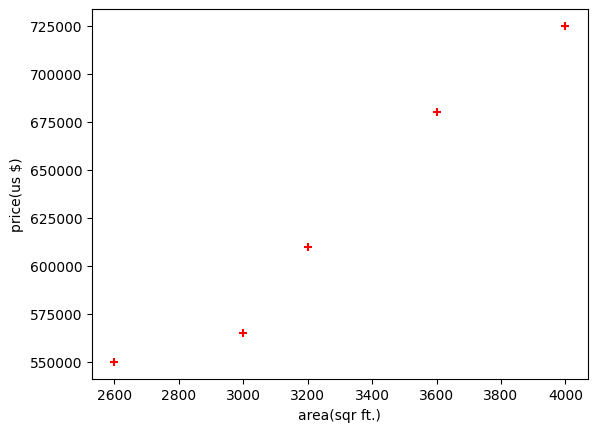

In [6]:
%matplotlib inline
plt.xlabel('area(sqr ft.)')
plt.ylabel('price(us $)')
plt.scatter(df.area,df.price,color='red',marker='+') #IPython has a set of predefined ‘magic functions’ that you can call with a command line style syntax. There are two kinds of magics, line-oriented and cell-oriented. Line magics are prefixed with the % character and work much like OS command-line calls: they get as an argument the rest of the line, where arguments are passed without parentheses or quotes. Lines magics can return results and can be used in the right hand side of an assignment. Cell magics are prefixed with a double %%, and they are functions that get as an argument not only the rest of the line, but also the lines below it in a separate argument.

In [7]:
reg= linear_model.LinearRegression()
reg.fit(df[['area']],df.price)

LinearRegression()

In [8]:
reg.predict([[3300]])

c:\Python310\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([628715.75342466])

In [9]:
reg.intercept_

180616.43835616432

In [10]:
reg.coef_

array([135.78767123])

In [11]:
d= pd.read_csv('area.csv')

In [12]:
d

,area
0,3000
1,4000
2,4600
3,5000
4,5200
5,6900
6,6700
7,3500
8,2300
9,6500


In [13]:
d.head(3)

,area
0,3000
1,4000
2,4600


In [14]:
p=reg.predict(d)

In [15]:
d['prices']= p

In [16]:
d.to_csv("prediction_prices.csv",index=False)

In [17]:
d

,area,prices
0,3000,5.879795e+05
1,4000,7.237671e+05
2,4600,8.052397e+05
3,5000,8.595548e+05
4,5200,8.867123e+05
5,6900,1.117551e+06
6,6700,1.090394e+06
7,3500,6.558733e+05
8,2300,4.929281e+05
9,6500,1.063236e+06


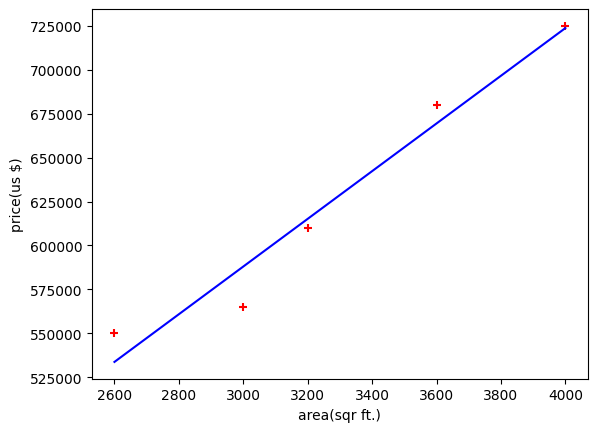

In [18]:
%matplotlib inline
plt.xlabel('area(sqr ft.)')
plt.ylabel('price(us $)')
plt.scatter(df.area,df.price,color='red',marker='+')
plt.plot(df.area,reg.predict(df[['area']]), color='blue')

In [19]:
import pickle

In [20]:
with open('model_pickle','wb') as f:
    pickle.dump(reg,f)

In [21]:
with open('model_pickle','rb') as f:
    mp=pickle.load(f)

In [22]:
mp.predict([[5000]])

c:\Python310\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([859554.79452055])

In [23]:
from sklearn.externals import joblib
joblib.dump(reg,'model_joblib')

ImportError: cannot import name 'joblib' from 'sklearn.externals' (c:\Python310\lib\site-packages\sklearn\externals\__init__.py)